In [1]:
#-m pip install --upgrade pip
# pip install pandas
# pip install matplotlib
#pip install statsmodels
#pip install sklearn

In [2]:
pip install --upgrade pip

     |████████████████████████████████| 2.1MB 4.2MB/s eta 0:00:01
  Found existing installation: pip 19.2.3
    Uninstalling pip-19.2.3:
      Successfully uninstalled pip-19.2.3
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split


In [5]:
df = pd.read_csv(r"data2013-2021.csv")
df

,Year,Month,Bought,Sold,NV,Lost
0,2013,January,735422368.7,712147000.0,403465.600,2.287190e+07
1,2013,February,657988856.3,640633717.3,347800.550,1.700734e+07
2,2013,March,663373030.9,649168952.2,357794.550,1.384628e+07
3,2013,April,533983791.4,519744979.3,255663.800,1.398315e+07
4,2013,May,493381739.3,481595212.5,196548.400,1.158998e+07
...,...,...,...,...,...,...
105,2021,October,514226362.7,506857003.8,316669.565,7.052689e+06
106,2021,November,541704980.8,532236963.9,356965.930,9.111051e+06
107,2021,December,705779288.1,696793547.9,462805.350,8.522935e+06
108,2022,January,743431196.2,731220808.8,490604.900,1.171978e+07


In [6]:
for col in df.columns:
    print(col)

df.columns = df.columns.str.strip()
df['Month']=df['Month'].str.strip()


Year
Month 
Bought 
Sold 
NV 
Lost


In [7]:
df['Date'] = pd.to_datetime(['{}-{}-01'.format(y, m) for y, m in zip(df.Year, df.Month)])
#pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

#for time series analysis date must be set as index
df = df.set_index('Date')
df.head()

,Year,Month,Bought,Sold,NV,Lost
Date,,,,,,
2013-01-01,2013,January,735422368.7,712147000.0,403465.60,22871903.08
2013-02-01,2013,February,657988856.3,640633717.3,347800.55,17007338.45
2013-03-01,2013,March,663373030.9,649168952.2,357794.55,13846284.18
2013-04-01,2013,April,533983791.4,519744979.3,255663.80,13983148.33
2013-05-01,2013,May,493381739.3,481595212.5,196548.40,11589978.44


In [8]:
df1=df.filter(['Bought','Sold','NV', 'Lost'], axis=1)
df1


,Bought,Sold,NV,Lost
Date,,,,
2013-01-01,735422368.7,712147000.0,403465.600,2.287190e+07
2013-02-01,657988856.3,640633717.3,347800.550,1.700734e+07
2013-03-01,663373030.9,649168952.2,357794.550,1.384628e+07
2013-04-01,533983791.4,519744979.3,255663.800,1.398315e+07
2013-05-01,493381739.3,481595212.5,196548.400,1.158998e+07
...,...,...,...,...
2021-10-01,514226362.7,506857003.8,316669.565,7.052689e+06
2021-11-01,541704980.8,532236963.9,356965.930,9.111051e+06
2021-12-01,705779288.1,696793547.9,462805.350,8.522935e+06


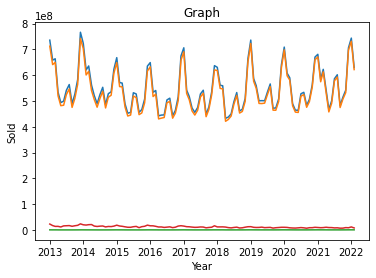

In [9]:
plt.xlabel("Year")
plt.ylabel("Sold")
plt.title("Graph")
plt.plot(df1)

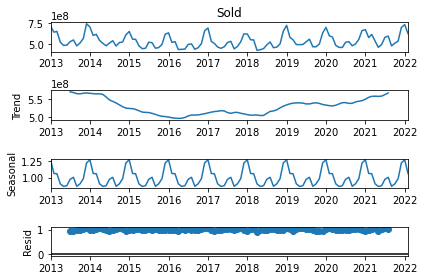

In [10]:
decompose_result = seasonal_decompose(df1['Sold'],model='multiplicative')
decompose_result.plot();
#the data has all 3, Levels, Trends, Seasonality.

In [11]:
# Set the frequency of the date time index as Monthly start as indicated by the data
df1.index.freq = 'MS'
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

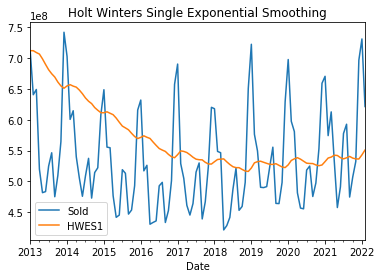

In [12]:
df1['HWES1'] = SimpleExpSmoothing(df1['Sold']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
df1[['Sold','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');
#it didn't fit because Single ES doesn't work for data with Trends and Seasonality

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


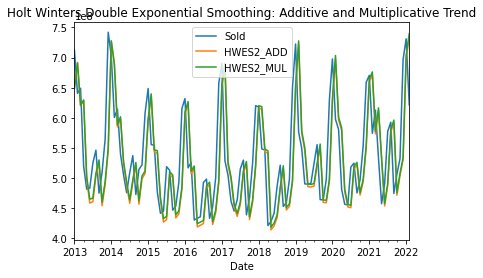

In [13]:
df1['HWES2_ADD'] = ExponentialSmoothing(df1['Sold'],trend='add').fit().fittedvalues
df1['HWES2_MUL'] = ExponentialSmoothing(df1['Sold'],trend='mul').fit().fittedvalues
df1[['Sold','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


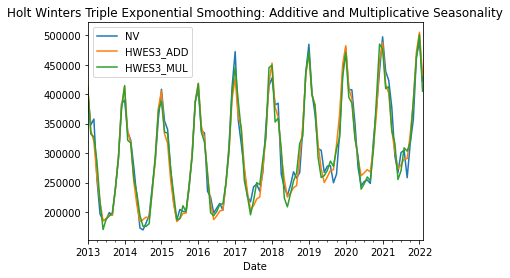

In [14]:
df1['HWES3_ADD'] = ExponentialSmoothing(df1['NV'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df1['HWES3_MUL'] = ExponentialSmoothing(df1['NV'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df1[['NV','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

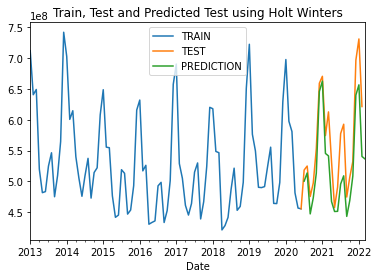

In [15]:
train = df1[:90]
test = df1[89:]
fitted_model = ExponentialSmoothing(train['Sold'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(21)
train['Sold'].plot(legend=True,label='TRAIN')
test['Sold'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')



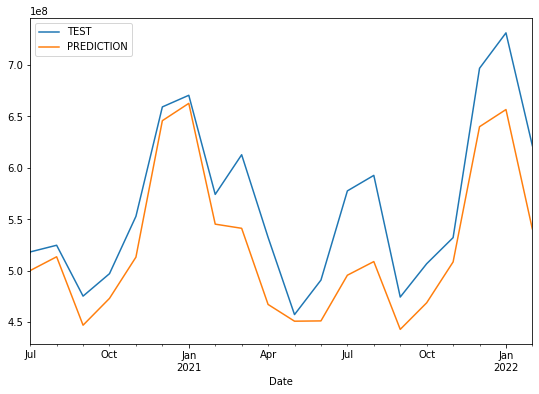

In [16]:
test['Sold'].plot(legend=True,label='TEST',figsize=(9,6))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2020-07-01','2022-02-01']);

In [17]:
test=test['Sold']
print(f'Mean Absolute Error = {mean_absolute_error(test,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_predictions)}')

Mean Absolute Error = 61305904.7929797
Mean Squared Error = 6936054701959604.0
